# ACA 3
Author: Chendanni Liu


As a data scientist hired by a non-profit organization whose mission is to increase college graduation rates for underpriveleged populations. Through advocacy and targeted outreach programs,I am strives to identify and alleviate barriers to educational achievement. 

I am committed to developing a more data-based approach to decision making. As a prelude to future analyses, to analyze the data to identify clusters of similar colleges and universities

Using the variables that I picked which are closely related to equity scores and gaps in determine such school's information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
### Importing College scorecard dataset

In [2]:
Scorecard = pd.read_csv('CollegeScorecard.csv')
Scorecard

D:\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,9,1427,1542,1561,1575,1725,1726,1727,1728) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP
0,100654.0,100200.0,1002.0,Alabama A & M University,Normal,AL,35762.00,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.44,0.45,0.48,0.41,0.42,0.44,NaN,0.31,NaN,0.35
1,100663.0,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.73,0.80,0.76,0.76,0.75,0.77,NaN,0.51,NaN,0.47
2,100690.0,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.60,0.78,0.61,0.69,0.63,0.65,NaN,PrivacySuppressed,NaN,PrivacySuppressed
3,100706.0,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899.00,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.74,0.85,0.77,0.80,0.78,0.79,NaN,0.48,NaN,0.49
4,100724.0,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.32,0.38,0.36,0.29,0.32,0.33,NaN,0.26,NaN,0.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703.0,157107.0,1571.0,Georgia Military College-Columbus Campus,Columbus,GA,31909.00,NaN,http://columbus.gmc.cc.ga.us/,NaN,...,0.43,0.61,0.49,0.46,0.49,0.50,NaN,NaN,NaN,NaN
7800,48285704.0,157101.0,1571.0,Georgia Military College-Valdosta Campus,Valdosta,GA,31605.00,NaN,http://valdosta.gmc.cc.ga.us/,NaN,...,0.43,0.61,0.49,0.46,0.49,0.50,NaN,NaN,NaN,NaN
7801,48285705.0,157105.0,1571.0,Georgia Military College-Warner Robins Campus,Warner Robins,GA,31093.00,NaN,http://robins.gmc.cc.ga.us/,NaN,...,0.43,0.61,0.49,0.46,0.49,0.50,NaN,NaN,NaN,NaN
7802,48285706.0,157100.0,1571.0,Georgia Military College-Online,Milledgeville,GA,31061.00,NaN,http://online.gmc.cc.ga.us/,NaN,...,0.43,0.61,0.49,0.46,0.49,0.50,NaN,NaN,NaN,NaN


# Selecting variables 

data filtering and cleaning the NAs. 

In [3]:
score_card = Scorecard.dropna(subset=['ADM_RATE','ADM_RATE_ALL'])

In [4]:
score_card1 = score_card.dropna(axis= "columns")
score_card1

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,HCM2,main,NUMBRANCH,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER
0,100654.0,100200.0,1002.0,Alabama A & M University,Normal,AL,35762.00,0.0,1.0,1.0,...,0.95,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.06,1.0
1,100663.0,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,0.0,1.0,1.0,...,0.26,0.03,0.05,0.00,0.00,0.03,0.01,0.01,0.26,1.0
3,100706.0,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899.00,0.0,1.0,1.0,...,0.13,0.03,0.04,0.01,0.00,0.02,0.03,0.03,0.24,1.0
4,100724.0,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,0.0,1.0,1.0,...,0.93,0.01,0.00,0.00,0.00,0.01,0.02,0.01,0.09,1.0
5,100751.0,105100.0,1051.0,The University of Alabama,Tuscaloosa,AL,35487-0166,0.0,1.0,1.0,...,0.11,0.03,0.01,0.00,0.00,0.02,0.03,0.00,0.09,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,482653.0,1072725.0,10727.0,DeVry University-Virginia,Arlington,VA,22202.00,0.0,0.0,26.0,...,0.42,0.11,0.03,0.01,0.00,0.01,0.03,0.16,0.48,1.0
7368,482662.0,1072723.0,10727.0,DeVry University-Washington,Federal Way,WA,98001.00,0.0,0.0,26.0,...,0.10,0.06,0.06,0.01,0.03,0.02,0.00,0.18,0.49,1.0
7369,482671.0,1072739.0,10727.0,DeVry University-Wisconsin,Milwaukee,WI,53202.00,0.0,0.0,26.0,...,0.30,0.08,0.02,0.01,0.01,0.01,0.01,0.05,0.61,1.0
7370,482680.0,158500.0,1585.0,University of North Georgia,Dahlonega,GA,30597.00,0.0,1.0,1.0,...,0.04,0.09,0.03,0.00,0.00,0.02,0.01,0.01,0.31,1.0


Removing strings 


In [5]:
score_card2 = score_card1.drop(score_card1.columns[score_card1.columns.str.match(r'PrivacySupressed')], axis=1)

In [6]:
score_card2

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,HCM2,main,NUMBRANCH,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER
0,100654.0,100200.0,1002.0,Alabama A & M University,Normal,AL,35762.00,0.0,1.0,1.0,...,0.95,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.06,1.0
1,100663.0,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,0.0,1.0,1.0,...,0.26,0.03,0.05,0.00,0.00,0.03,0.01,0.01,0.26,1.0
3,100706.0,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899.00,0.0,1.0,1.0,...,0.13,0.03,0.04,0.01,0.00,0.02,0.03,0.03,0.24,1.0
4,100724.0,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,0.0,1.0,1.0,...,0.93,0.01,0.00,0.00,0.00,0.01,0.02,0.01,0.09,1.0
5,100751.0,105100.0,1051.0,The University of Alabama,Tuscaloosa,AL,35487-0166,0.0,1.0,1.0,...,0.11,0.03,0.01,0.00,0.00,0.02,0.03,0.00,0.09,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,482653.0,1072725.0,10727.0,DeVry University-Virginia,Arlington,VA,22202.00,0.0,0.0,26.0,...,0.42,0.11,0.03,0.01,0.00,0.01,0.03,0.16,0.48,1.0
7368,482662.0,1072723.0,10727.0,DeVry University-Washington,Federal Way,WA,98001.00,0.0,0.0,26.0,...,0.10,0.06,0.06,0.01,0.03,0.02,0.00,0.18,0.49,1.0
7369,482671.0,1072739.0,10727.0,DeVry University-Wisconsin,Milwaukee,WI,53202.00,0.0,0.0,26.0,...,0.30,0.08,0.02,0.01,0.01,0.01,0.01,0.05,0.61,1.0
7370,482680.0,158500.0,1585.0,University of North Georgia,Dahlonega,GA,30597.00,0.0,1.0,1.0,...,0.04,0.09,0.03,0.00,0.00,0.02,0.01,0.01,0.31,1.0


In [7]:
from scipy import stats
%matplotlib notebook

removing the ID

In [8]:
score_card3 = score_card2.drop(['INSTNM','CITY','STABBR','ZIP'], axis=1)
score_card3

,UNITID,OPEID,opeid6,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER
0,100654.0,100200.0,1002.0,0.0,1.0,1.0,3.0,4.0,1.0,1.0,...,0.95,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.06,1.0
1,100663.0,105200.0,1052.0,0.0,1.0,1.0,3.0,4.0,1.0,1.0,...,0.26,0.03,0.05,0.00,0.00,0.03,0.01,0.01,0.26,1.0
3,100706.0,105500.0,1055.0,0.0,1.0,1.0,3.0,4.0,1.0,1.0,...,0.13,0.03,0.04,0.01,0.00,0.02,0.03,0.03,0.24,1.0
4,100724.0,100500.0,1005.0,0.0,1.0,1.0,3.0,4.0,1.0,1.0,...,0.93,0.01,0.00,0.00,0.00,0.01,0.02,0.01,0.09,1.0
5,100751.0,105100.0,1051.0,0.0,1.0,1.0,3.0,4.0,1.0,1.0,...,0.11,0.03,0.01,0.00,0.00,0.02,0.03,0.00,0.09,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,482653.0,1072725.0,10727.0,0.0,0.0,26.0,3.0,4.0,3.0,51.0,...,0.42,0.11,0.03,0.01,0.00,0.01,0.03,0.16,0.48,1.0
7368,482662.0,1072723.0,10727.0,0.0,0.0,26.0,3.0,4.0,3.0,53.0,...,0.10,0.06,0.06,0.01,0.03,0.02,0.00,0.18,0.49,1.0
7369,482671.0,1072739.0,10727.0,0.0,0.0,26.0,3.0,4.0,3.0,55.0,...,0.30,0.08,0.02,0.01,0.01,0.01,0.01,0.05,0.61,1.0
7370,482680.0,158500.0,1585.0,0.0,1.0,1.0,3.0,4.0,1.0,13.0,...,0.04,0.09,0.03,0.00,0.00,0.02,0.01,0.01,0.31,1.0


In [9]:
New_score_card= np.log(score_card3.iloc[:,1:]) 
New_score_card

,OPEID,opeid6,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER
0,11.514923,6.909753,-inf,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-0.051293,-4.605170,-inf,-inf,-inf,-inf,-inf,-4.605170,-2.813411,0.0
1,11.563619,6.958448,-inf,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-1.347074,-3.506558,-2.995732,-inf,-inf,-3.506558,-4.605170,-4.605170,-1.347074,0.0
3,11.566466,6.961296,-inf,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-2.040221,-3.506558,-3.218876,-4.60517,-inf,-3.912023,-3.506558,-3.506558,-1.427116,0.0
4,11.517913,6.912743,-inf,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-0.072571,-4.605170,-inf,-inf,-inf,-4.605170,-3.912023,-4.605170,-2.407946,0.0
5,11.562668,6.957497,-inf,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-2.207275,-3.506558,-4.605170,-inf,-inf,-3.912023,-3.506558,-inf,-2.407946,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,13.885713,9.280519,-inf,-inf,3.258097,1.098612,1.386294,1.098612,3.931826,1.609438,...,-0.867501,-2.207275,-3.506558,-4.60517,-inf,-4.605170,-3.506558,-1.832581,-0.733969,0.0
7368,13.885711,9.280519,-inf,-inf,3.258097,1.098612,1.386294,1.098612,3.970292,2.079442,...,-2.302585,-2.813411,-2.813411,-4.60517,-3.506558,-3.912023,-inf,-1.714798,-0.713350,0.0
7369,13.885726,9.280519,-inf,-inf,3.258097,1.098612,1.386294,1.098612,4.007333,1.098612,...,-1.203973,-2.525729,-3.912023,-4.60517,-4.605170,-4.605170,-4.605170,-2.995732,-0.494296,0.0
7370,11.973510,7.368340,-inf,0.0,0.000000,1.098612,1.386294,0.000000,2.564949,1.609438,...,-3.218876,-2.407946,-3.506558,-inf,-inf,-3.912023,-4.605170,-4.605170,-1.171183,0.0


There is infinity and  nagitive variables where we need to clean and normalize.


In [10]:
clean_score_card = New_score_card.replace([np.inf, -np.inf], np.nan)
clean_score_card

,OPEID,opeid6,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER
0,11.514923,6.909753,NaN,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-0.051293,-4.605170,NaN,NaN,NaN,NaN,NaN,-4.605170,-2.813411,0.0
1,11.563619,6.958448,NaN,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-1.347074,-3.506558,-2.995732,NaN,NaN,-3.506558,-4.605170,-4.605170,-1.347074,0.0
3,11.566466,6.961296,NaN,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-2.040221,-3.506558,-3.218876,-4.60517,NaN,-3.912023,-3.506558,-3.506558,-1.427116,0.0
4,11.517913,6.912743,NaN,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-0.072571,-4.605170,NaN,NaN,NaN,-4.605170,-3.912023,-4.605170,-2.407946,0.0
5,11.562668,6.957497,NaN,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-2.207275,-3.506558,-4.605170,NaN,NaN,-3.912023,-3.506558,NaN,-2.407946,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,13.885713,9.280519,NaN,NaN,3.258097,1.098612,1.386294,1.098612,3.931826,1.609438,...,-0.867501,-2.207275,-3.506558,-4.60517,NaN,-4.605170,-3.506558,-1.832581,-0.733969,0.0
7368,13.885711,9.280519,NaN,NaN,3.258097,1.098612,1.386294,1.098612,3.970292,2.079442,...,-2.302585,-2.813411,-2.813411,-4.60517,-3.506558,-3.912023,NaN,-1.714798,-0.713350,0.0
7369,13.885726,9.280519,NaN,NaN,3.258097,1.098612,1.386294,1.098612,4.007333,1.098612,...,-1.203973,-2.525729,-3.912023,-4.60517,-4.605170,-4.605170,-4.605170,-2.995732,-0.494296,0.0
7370,11.973510,7.368340,NaN,0.0,0.000000,1.098612,1.386294,0.000000,2.564949,1.609438,...,-3.218876,-2.407946,-3.506558,NaN,NaN,-3.912023,-4.605170,-4.605170,-1.171183,0.0


In [11]:
limitPer = len(clean_score_card) * .8
clean_score_card1= clean_score_card.dropna(thresh=limitPer, axis=1)
clean_score_card1

,OPEID,opeid6,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,ADM_RATE,ADM_RATE_ALL,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_2MOR,PPTUG_EF,CURROPER
0,11.514923,6.909753,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,-0.105361,-0.105361,8.306719,-3.506558,-0.051293,-4.605170,NaN,NaN,-2.813411,0.0
1,11.563619,6.958448,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,-0.139262,-0.139262,9.323669,-0.510826,-1.347074,-3.506558,-2.995732,-3.506558,-1.347074,0.0
3,11.566466,6.961296,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,-0.210721,-0.210721,8.617039,-0.356675,-2.040221,-3.506558,-3.218876,-3.912023,-1.427116,0.0
4,11.517913,6.912743,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,-0.673345,-0.673345,8.585599,-3.912023,-0.072571,-4.605170,NaN,-4.605170,-2.407946,0.0
5,11.562668,6.957497,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,-0.562119,-0.562119,10.264374,-0.235722,-2.207275,-3.506558,-4.605170,-3.912023,-2.407946,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,13.885713,9.280519,NaN,3.258097,1.098612,1.386294,1.098612,3.931826,1.609438,-0.223144,-0.274437,6.663133,-1.427116,-0.867501,-2.207275,-3.506558,-4.605170,-0.733969,0.0
7368,13.885711,9.280519,NaN,3.258097,1.098612,1.386294,1.098612,3.970292,2.079442,-0.248461,-0.274437,6.144186,-0.597837,-2.302585,-2.813411,-2.813411,-3.912023,-0.713350,0.0
7369,13.885726,9.280519,NaN,3.258097,1.098612,1.386294,1.098612,4.007333,1.098612,-0.798508,-0.274437,4.997212,-0.673345,-1.203973,-2.525729,-3.912023,-4.605170,-0.494296,0.0
7370,11.973510,7.368340,0.0,0.000000,1.098612,1.386294,0.000000,2.564949,1.609438,-0.494296,-0.494296,9.582042,-0.235722,-3.218876,-2.407946,-3.506558,-3.912023,-1.171183,0.0


drop main columns and Nan 

In [12]:
clean_score_card2 = clean_score_card1.drop('main',1)
clean_score_card3 = clean_score_card2.dropna(axis= "rows")

C:\Users\16266\AppData\Local\Temp/ipykernel_16416/3649599487.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  clean_score_card2 = clean_score_card1.drop('main',1)


In [13]:
clean_score_card3

,OPEID,opeid6,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,ADM_RATE,ADM_RATE_ALL,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_2MOR,PPTUG_EF,CURROPER
1,11.563619,6.958448,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,-0.139262,-0.139262,9.323669,-0.510826,-1.347074,-3.506558,-2.995732,-3.506558,-1.347074,0.0
3,11.566466,6.961296,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,-0.210721,-0.210721,8.617039,-0.356675,-2.040221,-3.506558,-3.218876,-3.912023,-1.427116,0.0
5,11.562668,6.957497,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,-0.562119,-0.562119,10.264374,-0.235722,-2.207275,-3.506558,-4.605170,-3.912023,-2.407946,0.0
10,11.524854,6.919684,0.000000,1.098612,1.098612,0.693147,0.000000,1.609438,-0.446287,-0.446287,7.074117,-0.210721,-2.407946,-3.506558,-3.218876,-4.605170,-4.605170,0.0
22,13.776881,9.171703,2.397895,0.000000,1.098612,1.098612,0.000000,1.609438,-0.328504,-0.287682,5.762051,-1.049822,-0.527633,-4.605170,-4.605170,-3.506558,-0.693147,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,13.885713,9.280519,3.258097,1.098612,1.386294,1.098612,3.931826,1.609438,-0.223144,-0.274437,6.663133,-1.427116,-0.867501,-2.207275,-3.506558,-4.605170,-0.733969,0.0
7368,13.885711,9.280519,3.258097,1.098612,1.386294,1.098612,3.970292,2.079442,-0.248461,-0.274437,6.144186,-0.597837,-2.302585,-2.813411,-2.813411,-3.912023,-0.713350,0.0
7369,13.885726,9.280519,3.258097,1.098612,1.386294,1.098612,4.007333,1.098612,-0.798508,-0.274437,4.997212,-0.673345,-1.203973,-2.525729,-3.912023,-4.605170,-0.494296,0.0
7370,11.973510,7.368340,0.000000,1.098612,1.386294,0.000000,2.564949,1.609438,-0.494296,-0.494296,9.582042,-0.235722,-3.218876,-2.407946,-3.506558,-3.912023,-1.171183,0.0


# Principal Component Analysis

In [14]:
# Import the standard stuff
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [15]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(clean_score_card3)

PCA()

In [16]:
pca.explained_variance_ratio_

array([3.25918832e-01, 1.49382886e-01, 1.22581546e-01, 8.89774467e-02,
       8.05965428e-02, 6.37060948e-02, 4.01083874e-02, 3.56503559e-02,
       2.76249309e-02, 1.94817772e-02, 1.66569729e-02, 1.15760875e-02,
       7.01654124e-03, 5.15109063e-03, 4.53259375e-03, 7.52555188e-04,
       2.85358745e-04, 0.00000000e+00])

By looking at the variance ratio, we see 8 variables are above 5, so trying 8 components first is a way. 

In [17]:
acapca = PCA(n_components=8)
acapca.fit(clean_score_card3)
print("The principal components are:")
print(acapca.components_)
print("The explained variances are:")
print(acapca.explained_variance_)

The principal components are:
[[ 3.78671557e-01  2.89557406e-01  5.69074447e-01 -7.46363672e-02
  -7.24474397e-02  1.23350697e-01  7.65743276e-03  3.71760065e-02
   4.53540686e-02  4.32156505e-02 -5.41491537e-01 -6.42304186e-02
   2.15138378e-01  3.17717789e-02 -8.24204801e-02 -3.53046688e-02
   2.54649938e-01 -0.00000000e+00]
 [ 4.45724005e-02  6.85826184e-02 -3.39854878e-01 -1.71113807e-05
  -2.69272099e-02  5.27047837e-02  2.15464056e-01 -1.35153288e-01
   1.22902061e-02  1.45099354e-02 -4.89284435e-01  2.12430409e-01
  -2.16902733e-01 -4.34619079e-01 -4.30911549e-01 -8.41347480e-02
  -3.09875564e-01  0.00000000e+00]
 [ 1.05041426e-01  1.03609060e-01  1.26106825e-02 -1.07512477e-02
  -2.15389680e-02  1.00793531e-01 -1.37138653e-01  8.71547603e-02
  -5.91900331e-02 -6.38805157e-02 -3.08409290e-01 -5.37540219e-02
  -3.72344364e-01  3.47075828e-01  4.62588661e-01  1.97692579e-01
  -5.68478733e-01 -0.00000000e+00]
 [ 2.73883225e-01  3.43575528e-01 -7.07296630e-01 -3.87056118e-02
  -4.46

<IPython.core.display.Javascript object>


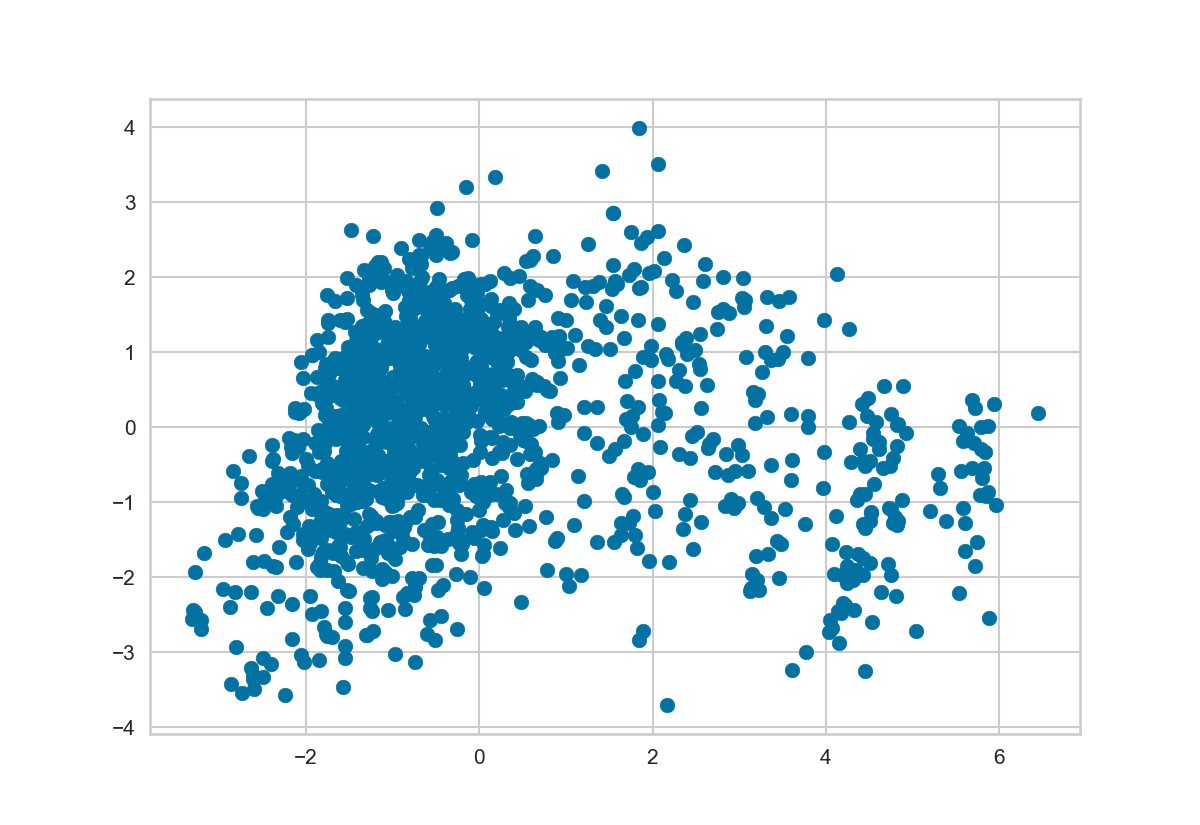

In [26]:
clean_score_card3_dr = acapca.transform(clean_score_card3)
plt.scatter(clean_score_card3_dr[:,0], clean_score_card3_dr[:,1])

Now as human eyes can see, I would say three clusters 

# K mean clusters

<IPython.core.display.Javascript object>


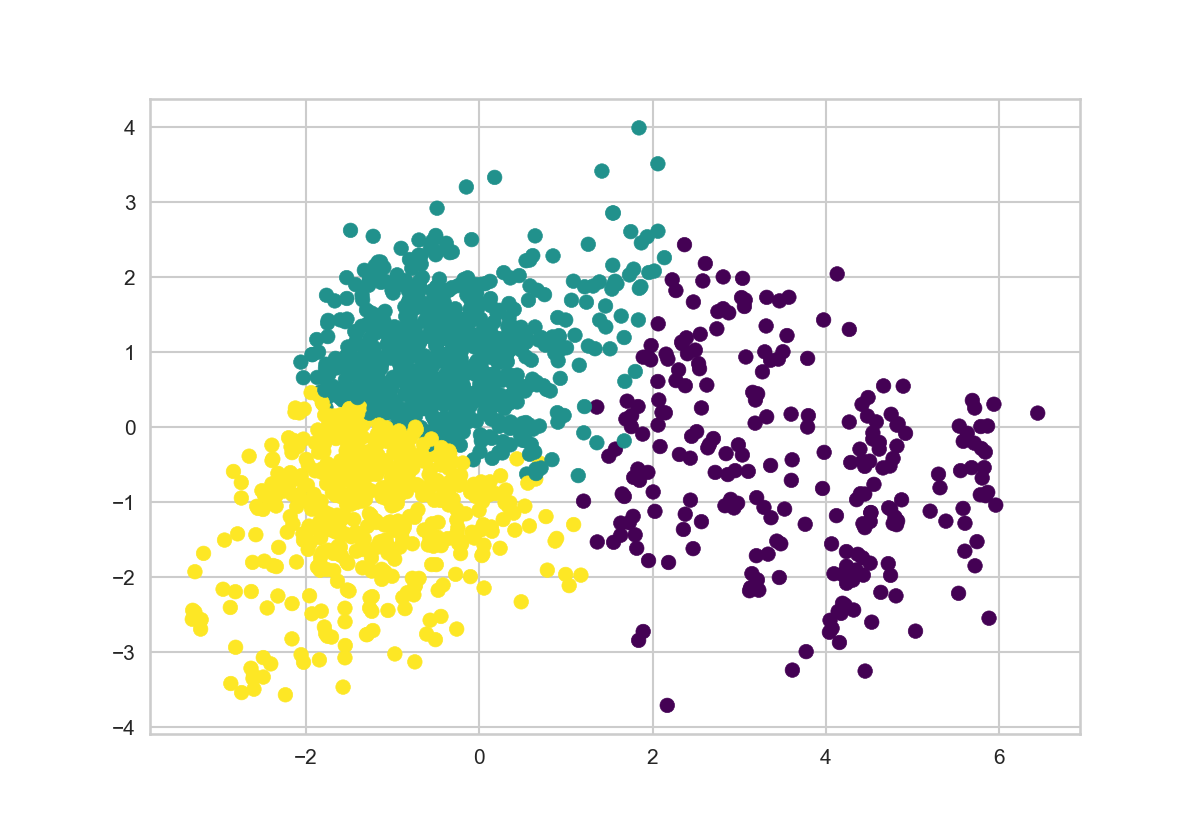

In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(clean_score_card3_dr)
cluster_kmeans = kmeans.predict(clean_score_card3_dr)

plt.scatter(clean_score_card3_dr[:, 0], clean_score_card3_dr[:, 1], c=cluster_kmeans, cmap='viridis') # Use cluster_means as the indicator for clusters

We now can see the graph above are clearly showing three clusters.

# Silhoutte Coefficient and Silhoutte Plot

In [20]:
from sklearn.metrics import silhouette_score

silhouetteScore = silhouette_score(clean_score_card3, cluster_kmeans, metric='euclidean')

# Print the score
print('Silhouetter Score:', silhouetteScore)

Silhouetter Score: 0.1645855610125393


In [21]:
conda install -c conda-forge yellowbrick

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\ANACONDA

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    yellowbrick-1.3.post1      |     pyhd8ed1ab_1         154 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         154 KB

The following packages will be UPDATED:

  yellowbrick        districtdatalabs/win-64::yellowbrick-~ --> conda-forge/noarch::yellowbrick-1.3.post1-pyhd8ed1ab_1




yellowbrick-1.3.post | 154 KB    |            |   0% 
yellowbrick-1.3.post | 154 KB    | #          |  10% 
yellowbrick-1.3.post | 154 KB    | ########## | 100% 
yellowbrick-1.3.post | 154 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... don

In [22]:
from yellowbrick.cluster import SilhouetteVisualizer

In [35]:
smodel = KMeans(n_clusters=3)
visualizer = SilhouetteVisualizer(smodel, colors='yellowbrick')

<IPython.core.display.Javascript object>


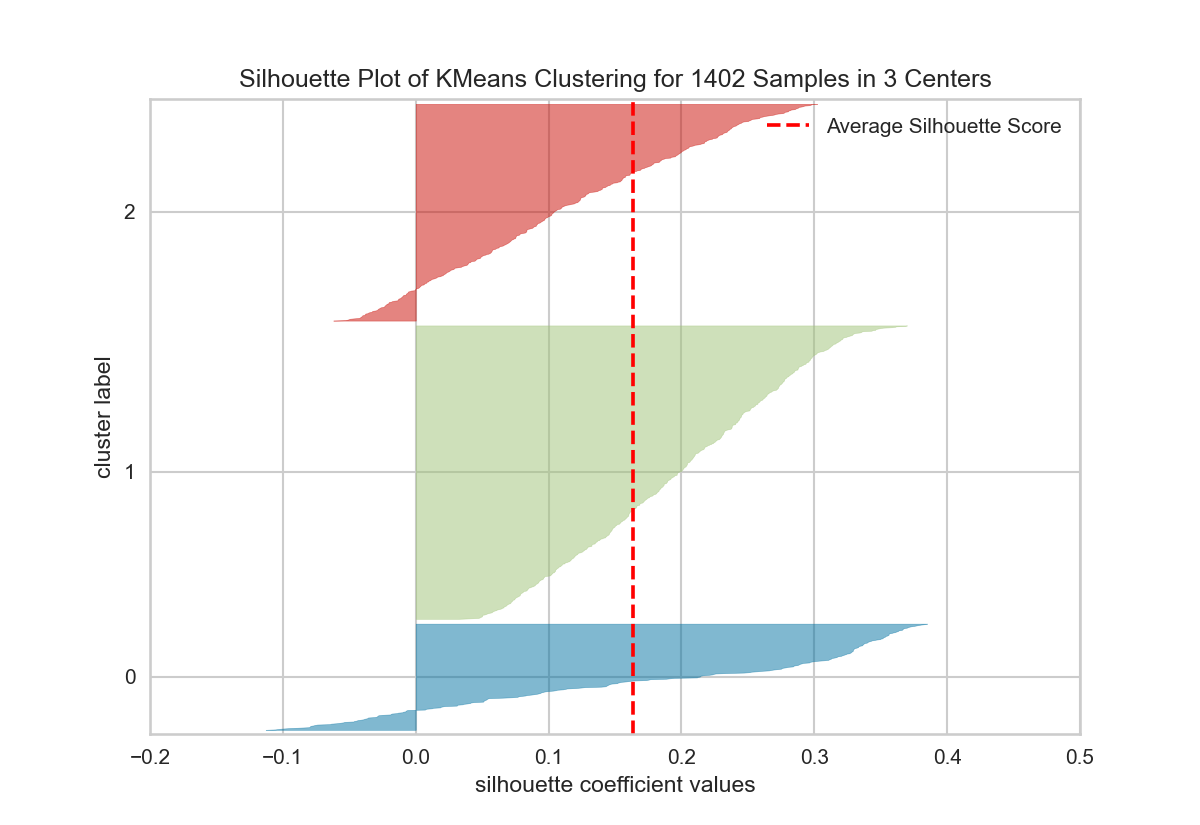

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1402 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [36]:
visualizer.fit(clean_score_card3) # Fit the data to the visualizer
visualizer.show()

The yellow brick showed three centers where the middle one is the most centralized. 

In conclusion, three clusters are good for this specific score card.
the Silhouetter Score of 0.16 meaning the variables are decentralized, this can be undersstand by seeing the cluster graph where we see lots outliers. 